# Regressão Linear com Python
- Carregar dataset de custo_diaria;
- Análise dos dados coletados;
- Tratamento dos dados;
- Aplicar modelo de ML de Regressão Linear;
- Avaliar as métricas do modelo criado;


# Importando as bibliotecas

In [15]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Coletando dados


In [19]:
# Abrindo doc com pandas
custo_diaria = pd.read_csv('/content/custo_diaria.csv', sep=';')

    qtd_pessoas  valor_diaria
0             1           150
1             4           385
2             6           499
3            10           680
4            13           735
5            15           859
6            18           989
7            22          1075
8            25          1500
9            30          1850
10           40          2000
11           42          2089
12           45          2250
13           47          2488
14           50          2680


# Analisando os dados coletados

In [20]:
# Visualizando base de dados, 5 primeiros
custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [21]:
# Gerando estatísticas da base de dados
custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [22]:
# Verificando se existe valor nulo ou ausente
custo_diaria.isna().sum()

,0
qtd_pessoas,0
valor_diaria,0


In [23]:
# Verificando informações da base de dados
custo_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   15 non-null     int64
 1   valor_diaria  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


# Análise de Correlação entre variáveis
Correlação Positiva: duas variáveis que possuem correlação crescem e decrescem juntas com uma realção direta.

Correlação Negativa: duas variáveis que possuem correlação mas quando uma cresce outra decresce e vice-versa.

In [25]:
custo_diaria.corr()

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.992069
valor_diaria,0.992069,1.000000


# Análise gráfica da correlação entre variáveis

<Axes: >

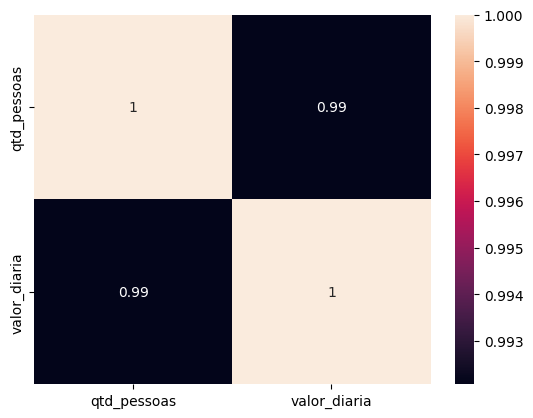

In [27]:
correlacao = custo_diaria.corr()

# seaborn para visualização
sns.heatmap(correlacao, annot=True)

# Tratamento de Dados

Preparar os dados para serem utilizados no modelo de Regressão Linear, deve ser feito para que os dados tenham o formato de entrada solicitado pelo algoritmo

#Criando variável independente X

In [30]:
# iloc = selecionar um conjunto de registros
# : = todos os registros
# 0 = primeira coluna
X = custo_diaria.iloc[:,0].values
print(X)

[ 1  4  6 10 13 15 18 22 25 30 40 42 45 47 50]


# Criando variável dependente Y

In [31]:
# Valores da coluna 1
Y = custo_diaria.iloc[:,1].values
print(Y)

[ 150  385  499  680  735  859  989 1075 1500 1850 2000 2089 2250 2488
 2680]


# Verificando tipos das variáveis

In [33]:
type(X)

numpy.ndarray

In [34]:
type(Y)

numpy.ndarray

In [35]:
X.shape

(15,)

# Transformando array em matriz

In [49]:
X = X.reshape(-1,1)

In [50]:
X.shape

(15, 1)

# Criando modelo de Machine Learning

In [52]:
from sklearn.linear_model import LinearRegression
predicao_custo_diaria = LinearRegression()

In [53]:
type(predicao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o treinamento do modelo

In [54]:
predicao_custo_diaria.fit(X, Y)

LinearRegression()

# Calculando a constante alfa - intercept

In [55]:
predicao_custo_diaria.intercept_

np.float64(155.91874556932066)

# Coeficiente angular da reta - coef

In [56]:
predicao_custo_diaria.coef_

array([48.61472504])

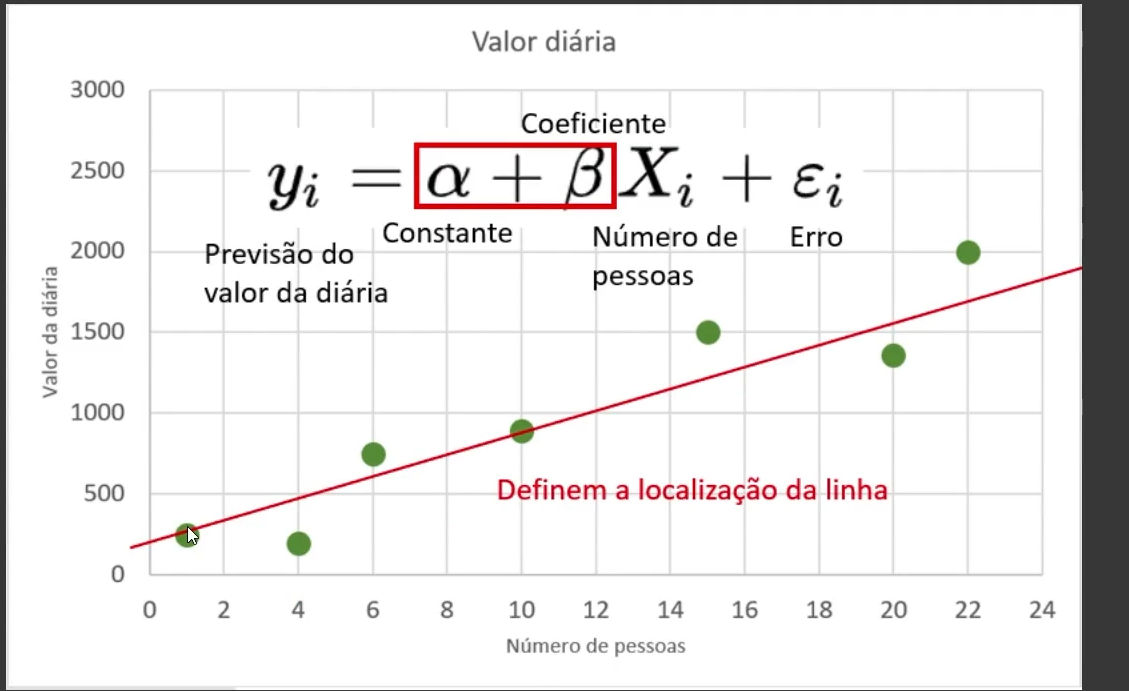

# Realizar predições dos valores da diária

Baseado no número de pessoas, vamos calcular o valor da diária

In [58]:
previsao_valores = predicao_custo_diaria.predict(X)

In [59]:
X

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [60]:
# Visualização da previsão para cada n de pessoas
previsao_valores

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

# Visualizando no gráfico a disposição dos dados
Para visualizar no gráfico, precisamos formatar os dados para vetor, por isso a função ravel()

# Gerando visualização gráfica

In [68]:
# Gráfico 1
grafico = px.scatter(x = X.ravel(), y=Y)
grafico.show()

In [69]:
# Gráfico 2
grafico = px.scatter(x = X.ravel(), y=Y)
grafico.add_scatter(x=X.ravel(), y = previsao_valores, name="Previsões")
grafico.show()

# Calculando o valor da diária de acordo com a Equação Linear

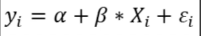

- Yi = previsão do preço da diária
- α = constante
- β = coeficiente de inclinação da reta
- Xi = n de pessoas
- Ei = erro

In [71]:
# Verificando os valores de uma determinada previsão na quantidade de pessoas
alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 8

alfa + beta * Xi

array([544.83654593])

# Calculando o valor da diária através da função predict do modelo

In [73]:
# Verificando de modo direto
predicao_custo_diaria.predict([[8]])

array([544.83654593])

# Avaliação do modelo

In [74]:
# Calculando a acurácia do modelo
predicao_custo_diaria.score(X,Y)

0.984200996064679

# Calculando o Mean Absolut Error

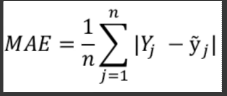

In [75]:
mean_absolute_error(Y, previsao_valores)

83.84480977618742

# Calculando o Mean Squared Error

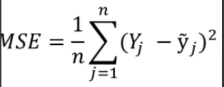

In [76]:
MSL = mean_squared_error(Y, previsao_valores)
print(MSL)

9989.829839426571


# Calculando o Root Mean Squared Error

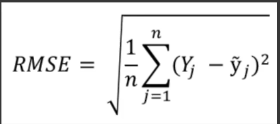

In [77]:
np.sqrt(MSL)

np.float64(99.9491362615334)